In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil
from sklearn.preprocessing import MinMaxScaler

# Server Stats Data Processing

In [2]:
# Import cpu load dataset
cpu_df = pd.read_csv("data/Log Report_2022-05-07_16-04.csv", encoding='utf-8')
cpu_df.head()

,Collection Time,Status,CPU (%),Memory (%),Disk Used (%),Reason
0,May 6 2022 11:59:43 PM PDT,Up,5.88,75.59,72.46,-
1,May 6 2022 11:58:43 PM PDT,Up,6.38,75.56,72.46,-
2,May 6 2022 11:57:43 PM PDT,Up,6.13,75.52,72.46,-
3,May 6 2022 11:56:43 PM PDT,Up,6.75,75.62,72.46,-
4,May 6 2022 11:55:43 PM PDT,Up,6.75,75.55,72.46,-


In [3]:
# Rename columns to remove spaces and symbols
cpu_df.rename(columns={'Collection Time': 'Date', 'CPU (%)': 'CPU', 'Memory (%)': 'Memory', 'Disk Used (%)': 'Disk_Used'}, inplace=True)
cpu_df.head()

,Date,Status,CPU,Memory,Disk_Used,Reason
0,May 6 2022 11:59:43 PM PDT,Up,5.88,75.59,72.46,-
1,May 6 2022 11:58:43 PM PDT,Up,6.38,75.56,72.46,-
2,May 6 2022 11:57:43 PM PDT,Up,6.13,75.52,72.46,-
3,May 6 2022 11:56:43 PM PDT,Up,6.75,75.62,72.46,-
4,May 6 2022 11:55:43 PM PDT,Up,6.75,75.55,72.46,-


In [4]:
# Remove unneeded columns
cpu_df.drop(['Disk_Used', 'Reason', 'Status'], axis=1, inplace=True)

In [5]:
# define a 'real' time zone for each abbreviation:
tzmapping = {'PDT': dateutil.tz.gettz('America/Los_Angeles'),
             'PST': dateutil.tz.gettz('America/Los_Angeles')}

# convert date to datetime
cpu_df['Date'] = pd.to_datetime(cpu_df['Date'])
# cpu_df['Date'] = cpu_df['Date'].apply(dateutil.parser.parse, tzinfos=tzmapping)

C:\Users\adamw\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [6]:
# Set date to index
cpu_df = cpu_df.set_index('Date')
cpu_df.head()

,CPU,Memory
Date,,
2022-05-06 23:59:43,5.88,75.59
2022-05-06 23:58:43,6.38,75.56
2022-05-06 23:57:43,6.13,75.52
2022-05-06 23:56:43,6.75,75.62
2022-05-06 23:55:43,6.75,75.55


# Sales Data Processing

### SQL Query for sales data
```
DECLARE @day DATETIME = '2022-05-03'

SELECT dateadd(minute,(datediff(minute,0,SaleDate)/1)*1,0) Date, COUNT(*) Sales
FROM dbo.TerminalSales
WHERE SaleDate BETWEEN @day AND DATEADD(DAY,1,@day)
AND SaleType = 0
GROUP BY dateadd(minute,(datediff(minute,0,SaleDate)/1)*1,0)
ORDER BY dateadd(minute,(datediff(minute,0,SaleDate)/1)*1,0)
```
### SQL Query for member data
```
DECLARE @day DATETIME = '2022-05-03'

SELECT dateadd(minute,(datediff(minute,0,StartTimeXN)/15)*15,0) Date, COUNT(*) MemberRequests
FROM dbo.TerminalMemberRequests
WHERE StartTimeXN BETWEEN @day AND DATEADD(DAY,1,@day)
GROUP BY dateadd(minute,(datediff(minute,0,StartTimeXN)/15)*15,0)
ORDER BY dateadd(minute,(datediff(minute,0,StartTimeXN)/15)*15,0)
```
### SQL Query for punchh data
```
DECLARE @day DATETIME = '2022-05-03'

SELECT dateadd(minute,(datediff(minute,0,StartTimeXN)/15)*15,0) Date, COUNT(*) MemberRequests
FROM dbo.TerminalMemberRequests
WHERE StartTimeXN BETWEEN @day AND DATEADD(DAY,1,@day)
AND MemberCardNo NOT LIKE 'Card%'
GROUP BY dateadd(minute,(datediff(minute,0,StartTimeXN)/15)*15,0)
ORDER BY dateadd(minute,(datediff(minute,0,StartTimeXN)/15)*15,0)
```

In [7]:
# Import sales data
sales_df = pd.read_csv("data/sales.csv", encoding='utf-8')
# convert date to datetime
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
# Set date as index
sales_df.set_index("Date",inplace=True)
sales_df.head()

,Sales
Date,
2022-05-06 08:28:00,1
2022-05-06 08:40:00,1
2022-05-06 08:45:00,1
2022-05-06 08:46:00,1
2022-05-06 08:47:00,1


In [8]:
# Import members data
members_df = pd.read_csv("data/members.csv", encoding='utf-8')
# convert date to datetime
members_df['Date'] = pd.to_datetime(members_df['Date'])
# Set date as index
members_df.set_index("Date",inplace=True)
members_df.head()

,MemberRequests
Date,
2022-05-06 00:00:00,2495
2022-05-06 00:15:00,2697
2022-05-06 00:30:00,2668
2022-05-06 00:45:00,2477
2022-05-06 01:00:00,2589


In [9]:
# Import punchh data
punchh_df = pd.read_csv("data/punchh.csv", encoding='utf-8')
# convert date to datetime
punchh_df['Date'] = pd.to_datetime(punchh_df['Date'])
# Set date as index
punchh_df.set_index("Date",inplace=True)
punchh_df.head()

,PunchhRequests
Date,
2022-05-06 00:00:00,22
2022-05-06 00:15:00,27
2022-05-06 00:30:00,25
2022-05-06 00:45:00,23
2022-05-06 01:00:00,25


# Graphs

<AxesSubplot:xlabel='Date'>

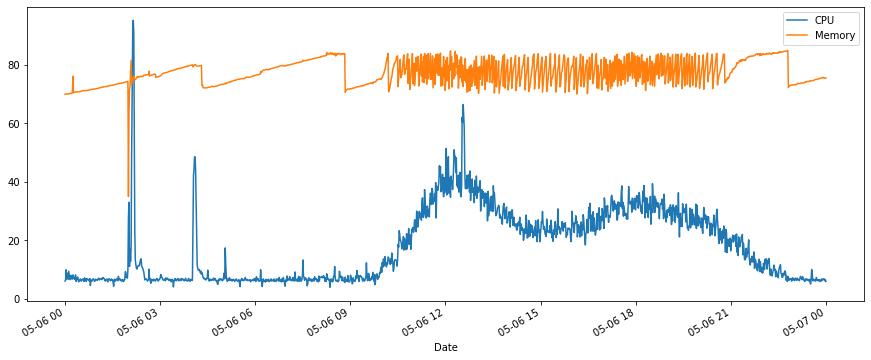

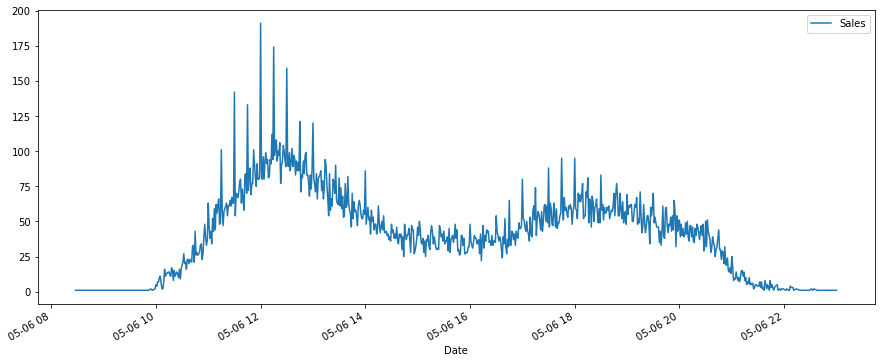

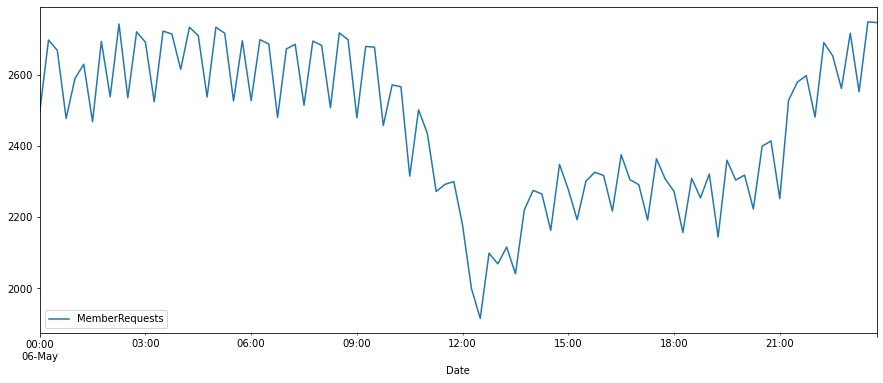

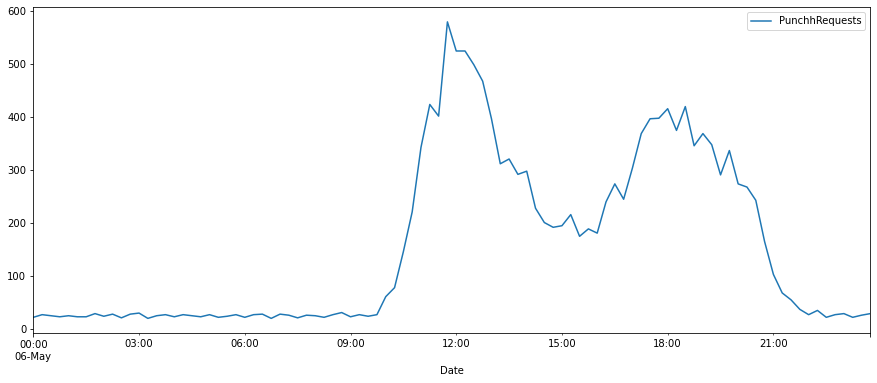

In [10]:
# Individual graphs
cpu_df.plot(figsize=(15,6))
sales_df.plot(figsize=(15,6))
members_df.plot(figsize=(15,6))
punchh_df.plot(figsize=(15,6))

<AxesSubplot:>

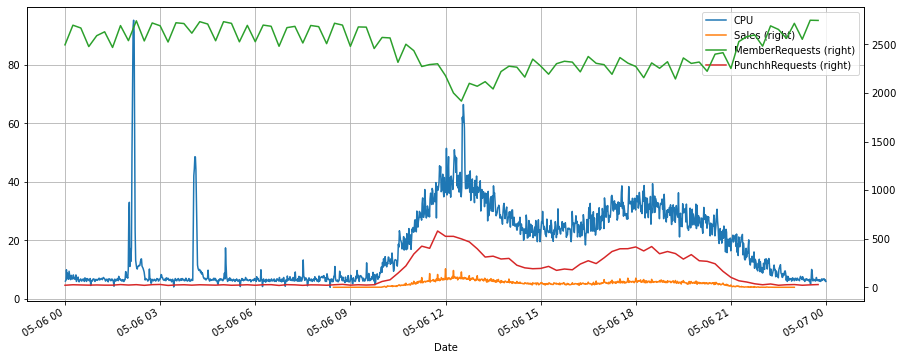

In [11]:
# None scaled graphs
cpu_df.CPU.plot(grid=True, label="CPU", legend=True, figsize=(15,6))
sales_df.Sales.plot(grid=True, secondary_y=True, label="Sales", legend=True)
members_df.MemberRequests.plot(grid=True, secondary_y=True, label="MemberRequests", legend=True)
punchh_df.PunchhRequests.plot(grid=True, secondary_y=True, label="PunchhRequests", legend=True)

# Scaling Graphs

In [12]:
# Create new dataframes for scaling
scaled_members_df = members_df
scaled_cpu_df = cpu_df
scaled_sales_df = sales_df
scaled_punchh_df = punchh_df

In [13]:
# Scale our dataframes to make the view more friendly
scaler = MinMaxScaler()
scaled_cpu_df['CPU'] = scaler.fit_transform(scaled_cpu_df['CPU'].values.reshape(-1,1))
scaled_cpu_df['Memory'] = scaler.fit_transform(scaled_cpu_df['Memory'].values.reshape(-1,1))
scaled_sales_df['Sales'] = scaler.fit_transform(scaled_sales_df['Sales'].values.reshape(-1,1))
scaled_members_df['MemberRequests'] = scaler.fit_transform(scaled_members_df['MemberRequests'].values.reshape(-1,1))
scaled_punchh_df['PunchhRequests'] = scaler.fit_transform(scaled_punchh_df['PunchhRequests'].values.reshape(-1,1))

In [14]:
from matplotlib import style
import seaborn as sns
style.use('seaborn-dark')
sns.set_context("paper")

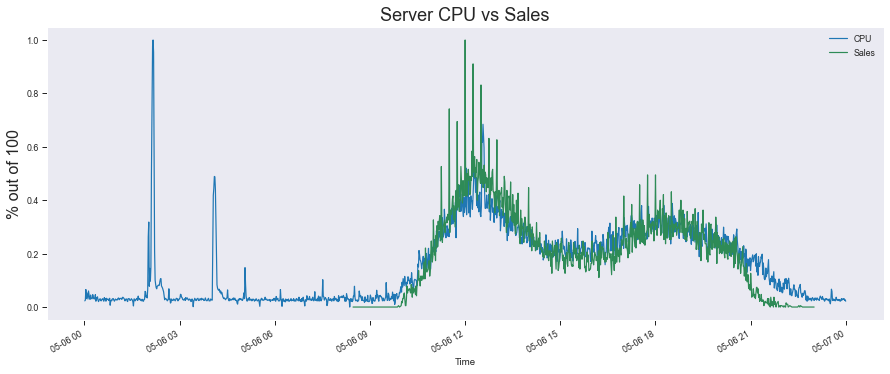

In [15]:
ax = scaled_cpu_df.CPU.plot(figsize=(15,6), color='tab:blue')
ax = scaled_sales_df.Sales.plot(figsize=(15,6), color='seagreen')

ax.set_title('Server CPU vs Sales', fontsize=18)
ax.set_ylabel('% out of 100', fontsize=16)
ax.set_xlabel('Time')
ax.legend()

fig = ax.get_figure()

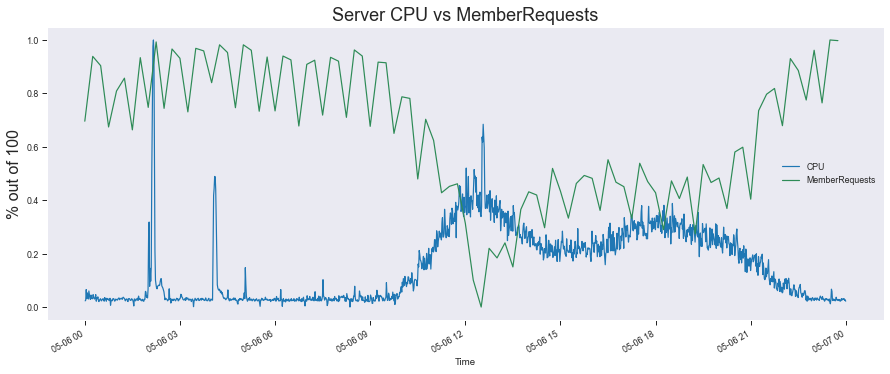

In [16]:
ax = scaled_cpu_df.CPU.plot(figsize=(15,6), color='tab:blue')
ax = scaled_members_df.MemberRequests.plot(figsize=(15,6), color='seagreen')

ax.set_title('Server CPU vs MemberRequests', fontsize=18)
ax.set_ylabel('% out of 100', fontsize=16)
ax.set_xlabel('Time')
ax.legend()

fig = ax.get_figure()

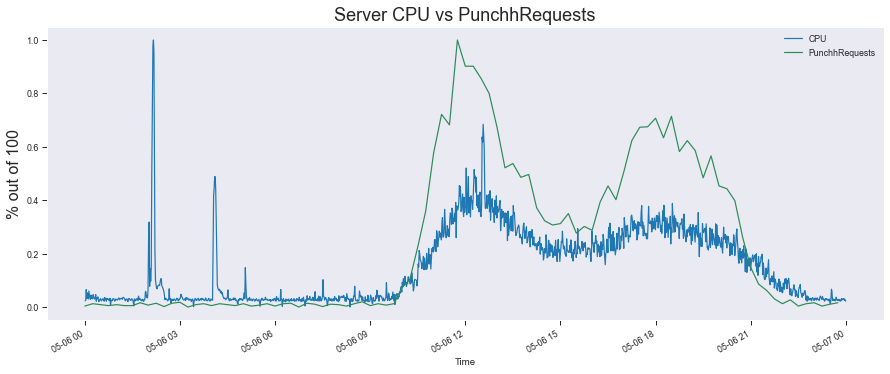

In [17]:
ax = scaled_cpu_df.CPU.plot(figsize=(15,6), color="tab:blue")
ax = scaled_punchh_df.PunchhRequests.plot(figsize=(15,6), color="seagreen")

ax.set_title('Server CPU vs PunchhRequests', fontsize=18)
ax.set_ylabel('% out of 100', fontsize=16)
ax.set_xlabel('Time')
ax.legend()

fig = ax.get_figure()